# importing necessary libararies

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# reading dataset

In [40]:
dataset = pd.read_csv('../Datasets/regression.csv')
dataset.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


# cleaning Dataset


In [41]:
dataset.isna().sum()

property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Area Type            0
Area Size            0
Area Category        0
dtype: int64

In [14]:
#df = dataset.dropna(axis=1)
#df.isna().sum()

In [38]:
df = dataset.drop_duplicates()
df = df.dropna()
df

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla
7,1258636,3241,https://www.zameen.com/Property/e_11_e_11_4_ap...,Flat,7800000,E-11,Islamabad,Islamabad Capital,33.698244,72.984238,2,6.2 Marla,For Sale,2,05-05-2019,Ettemad Enterprises,Balqiaz Marwat,Marla,6.2,5-10 Marla
8,1402466,376,https://www.zameen.com/Property/dha_defence_dh...,House,50000000,DHA Defence,Islamabad,Islamabad Capital,33.540894,73.095732,7,1 Kanal,For Sale,7,10-19-2018,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Kanal,1.0,1-5 Kanal
9,1418706,3282,https://www.zameen.com/Property/f_11_f_11_1_f_...,Penthouse,40000000,F-11,Islamabad,Islamabad Capital,33.679211,72.988787,5,1 Kanal,For Sale,5,06-27-2019,Crown Associate,Abrar Ahmed,Kanal,1.0,1-5 Kanal
10,1425602,429,https://www.zameen.com/Property/islamabad_dipl...,Flat,35000000,Diplomatic Enclave,Islamabad,Islamabad Capital,33.728873,73.119628,3,7.1 Marla,For Sale,3,06-03-2019,Al Sahar Estate,Zahid H. Usmani,Marla,7.1,5-10 Marla
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,17355248,6754,https://www.zameen.com/Property/gulshan_e_maym...,House,26500000,Gadap Town,Karachi,Sindh,25.029909,67.137192,0,9.6 Marla,For Sale,6,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla
168442,17355249,680,https://www.zameen.com/Property/gadap_town_gul...,House,12500000,Gadap Town,Karachi,Sindh,25.017951,67.136393,0,8 Marla,For Sale,3,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,8.0,5-10 Marla
168443,17355250,6757,https://www.zameen.com/Property/gulshan_e_maym...,House,27000000,Gadap Town,Karachi,Sindh,25.015384,67.116330,0,9.6 Marla,For Sale,6,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,9.6,5-10 Marla
168444,17355251,6752,https://www.zameen.com/Property/gulshan_e_maym...,House,11000000,Gadap Town,Karachi,Sindh,25.013265,67.120818,0,7.8 Marla,For Sale,3,07-18-2019,Al Shahab Enterprises,Shahmir,Marla,7.8,5-10 Marla


In [39]:
marla_mask = df['Area Type'] == "Marla"
df.loc[marla_mask, 'Area Size'] *= 25.2929
df.loc[~marla_mask, 'Area Size'] *= 505.857
df=df.drop(columns=['Area Type'],axis=1)
df

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Size,Area Category
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,202.34320,5-10 Marla
7,1258636,3241,https://www.zameen.com/Property/e_11_e_11_4_ap...,Flat,7800000,E-11,Islamabad,Islamabad Capital,33.698244,72.984238,2,6.2 Marla,For Sale,2,05-05-2019,Ettemad Enterprises,Balqiaz Marwat,156.81598,5-10 Marla
8,1402466,376,https://www.zameen.com/Property/dha_defence_dh...,House,50000000,DHA Defence,Islamabad,Islamabad Capital,33.540894,73.095732,7,1 Kanal,For Sale,7,10-19-2018,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,505.85700,1-5 Kanal
9,1418706,3282,https://www.zameen.com/Property/f_11_f_11_1_f_...,Penthouse,40000000,F-11,Islamabad,Islamabad Capital,33.679211,72.988787,5,1 Kanal,For Sale,5,06-27-2019,Crown Associate,Abrar Ahmed,505.85700,1-5 Kanal
10,1425602,429,https://www.zameen.com/Property/islamabad_dipl...,Flat,35000000,Diplomatic Enclave,Islamabad,Islamabad Capital,33.728873,73.119628,3,7.1 Marla,For Sale,3,06-03-2019,Al Sahar Estate,Zahid H. Usmani,179.57959,5-10 Marla
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,17355248,6754,https://www.zameen.com/Property/gulshan_e_maym...,House,26500000,Gadap Town,Karachi,Sindh,25.029909,67.137192,0,9.6 Marla,For Sale,6,07-18-2019,Al Shahab Enterprises,Shahmir,242.81184,5-10 Marla
168442,17355249,680,https://www.zameen.com/Property/gadap_town_gul...,House,12500000,Gadap Town,Karachi,Sindh,25.017951,67.136393,0,8 Marla,For Sale,3,07-18-2019,Al Shahab Enterprises,Shahmir,202.34320,5-10 Marla
168443,17355250,6757,https://www.zameen.com/Property/gulshan_e_maym...,House,27000000,Gadap Town,Karachi,Sindh,25.015384,67.116330,0,9.6 Marla,For Sale,6,07-18-2019,Al Shahab Enterprises,Shahmir,242.81184,5-10 Marla
168444,17355251,6752,https://www.zameen.com/Property/gulshan_e_maym...,House,11000000,Gadap Town,Karachi,Sindh,25.013265,67.120818,0,7.8 Marla,For Sale,3,07-18-2019,Al Shahab Enterprises,Shahmir,197.28462,5-10 Marla


# handling outliers


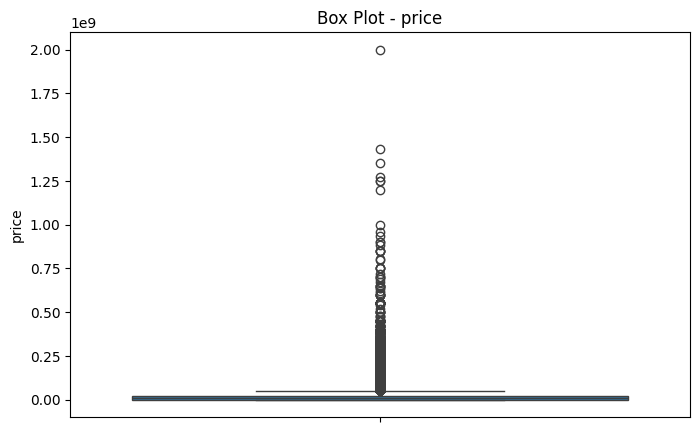

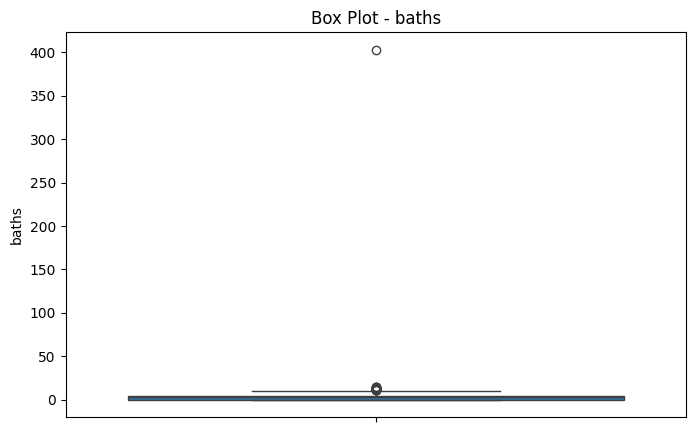

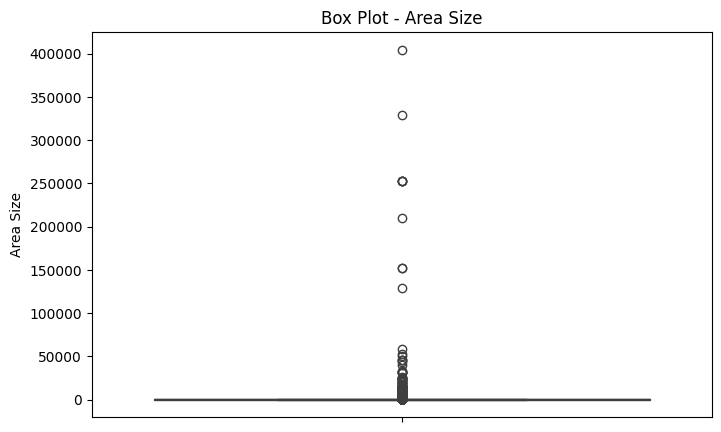

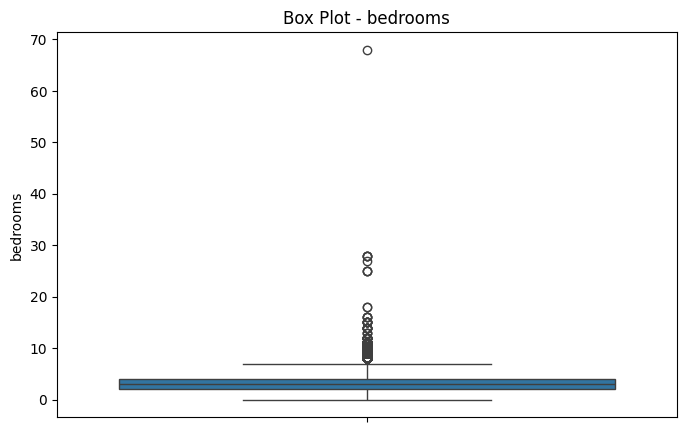

In [42]:

# Define numeric columns
numeric_columns = ['price', 'baths', 'Area Size', 'bedrooms']

# Function to visualize data distribution using box plots

def visualize_boxplot(df, columns):
    for col in columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(y=df[col])
        plt.title('Box Plot - ' + col)
        plt.ylabel(col)
        plt.show()

# Visualize data distribution using box plots before handling outliers
visualize_boxplot(df, numeric_columns)


In [32]:

arr=['price','baths','bedrooms','Area Size']
new_df=df.copy()
for col in arr:
    Q1 = new_df[col].quantile(0.25)
    Q3 = new_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    new_df[col] = np.where(
        new_df[col] > upper_bound,
        upper_bound,
        np.where(
            new_df[col] < lower_bound,
            lower_bound,
            new_df[col]
        )
    )
df = new_df


<class 'pandas.core.frame.DataFrame'>
Index: 96562 entries, 4 to 168445
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_id    96562 non-null  int64  
 1   location_id    96562 non-null  int64  
 2   page_url       96562 non-null  object 
 3   property_type  96562 non-null  object 
 4   price          96562 non-null  int64  
 5   location       96562 non-null  object 
 6   city           96562 non-null  object 
 7   province_name  96562 non-null  object 
 8   latitude       96562 non-null  float64
 9   longitude      96562 non-null  float64
 10  baths          96562 non-null  int64  
 11  area           96562 non-null  object 
 12  purpose        96562 non-null  object 
 13  bedrooms       96562 non-null  int64  
 14  date_added     96562 non-null  object 
 15  agency         96562 non-null  object 
 16  agent          96562 non-null  object 
 17  Area Size      96562 non-null  float64
 18  Area Categ

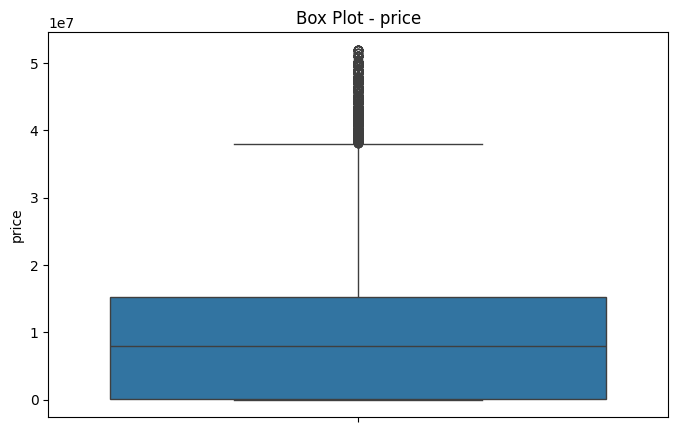

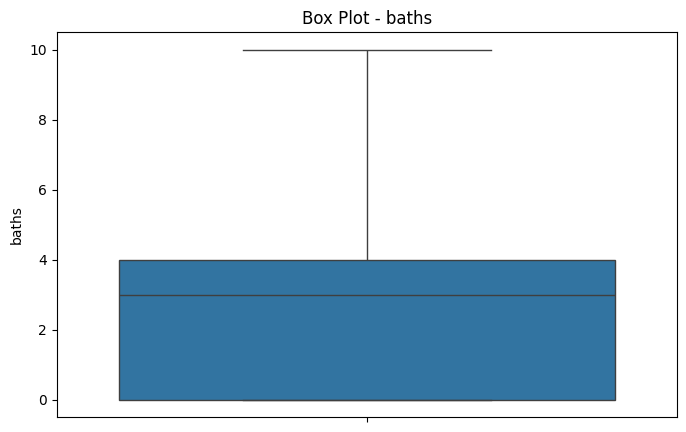

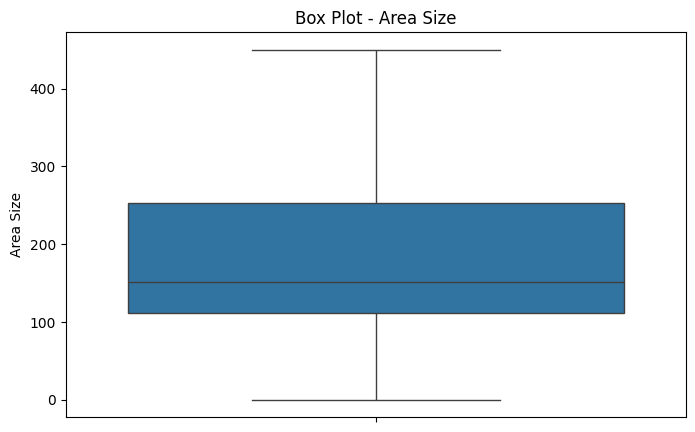

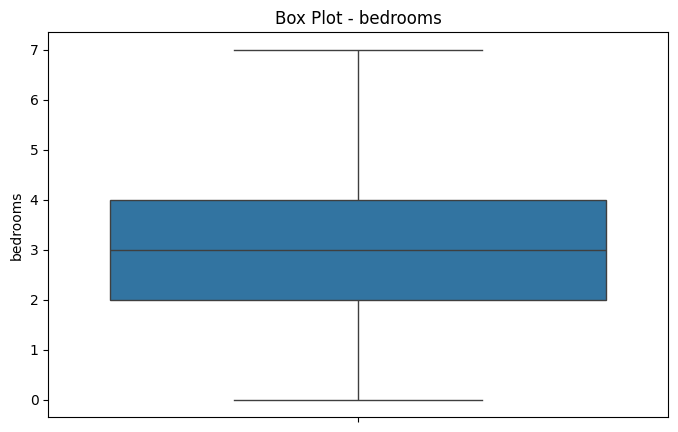

In [33]:
# visualize df after removing outliers
visualize_boxplot(df, numeric_columns)

# Feature Selection


In [18]:
drop_colums=['property_id', 'location_id', 'page_url', 'date_added', 'latitude', 'longitude','Area Category']
df = df.drop(columns= drop_colums, axis=1)
df

,property_type,price,location,city,province_name,baths,area,purpose,bedrooms,agency,agent,Area Size
4,House,7000000.0,DHA Defence,Islamabad,Islamabad Capital,3.0,8 Marla,For Sale,3.0,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,202.34320
7,Flat,7800000.0,E-11,Islamabad,Islamabad Capital,2.0,6.2 Marla,For Sale,2.0,Ettemad Enterprises,Balqiaz Marwat,156.81598
8,House,50000000.0,DHA Defence,Islamabad,Islamabad Capital,7.0,1 Kanal,For Sale,7.0,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,505.85700
9,Penthouse,40000000.0,F-11,Islamabad,Islamabad Capital,5.0,1 Kanal,For Sale,5.0,Crown Associate,Abrar Ahmed,505.85700
10,Flat,35000000.0,Diplomatic Enclave,Islamabad,Islamabad Capital,3.0,7.1 Marla,For Sale,3.0,Al Sahar Estate,Zahid H. Usmani,179.57959
...,...,...,...,...,...,...,...,...,...,...,...,...
168441,House,26500000.0,Gadap Town,Karachi,Sindh,0.0,9.6 Marla,For Sale,6.0,Al Shahab Enterprises,Shahmir,242.81184
168442,House,12500000.0,Gadap Town,Karachi,Sindh,0.0,8 Marla,For Sale,3.0,Al Shahab Enterprises,Shahmir,202.34320
168443,House,27000000.0,Gadap Town,Karachi,Sindh,0.0,9.6 Marla,For Sale,6.0,Al Shahab Enterprises,Shahmir,242.81184
168444,House,11000000.0,Gadap Town,Karachi,Sindh,0.0,7.8 Marla,For Sale,3.0,Al Shahab Enterprises,Shahmir,197.28462


# Feature scaling 


In [19]:
# Intializing a scaler to scale our numreic data
scaler = StandardScaler()

# Scaling our numeric data
df['price']=scaler.fit_transform(df[['price']])
df['baths']=scaler.fit_transform(df[['baths']])
df['bedrooms']=scaler.fit_transform(df[['bedrooms']])
df['Area Size']=scaler.fit_transform(df[['Area Size']])



# displaying the dataset after scaling numeric data
df.head()


,property_type,price,location,city,province_name,baths,area,purpose,bedrooms,agency,agent,Area Size
4,House,-0.469360,DHA Defence,Islamabad,Islamabad Capital,0.091302,8 Marla,For Sale,-0.061394,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,-0.282517
7,Flat,-0.420261,E-11,Islamabad,Islamabad Capital,-0.342979,6.2 Marla,For Sale,-0.603327,Ettemad Enterprises,Balqiaz Marwat,-0.553155
8,House,2.169693,DHA Defence,Islamabad,Islamabad Capital,1.828424,1 Kanal,For Sale,2.106337,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,1.521732
9,Penthouse,1.555960,F-11,Islamabad,Islamabad Capital,0.959863,1 Kanal,For Sale,1.022471,Crown Associate,Abrar Ahmed,1.521732
10,Flat,1.249093,Diplomatic Enclave,Islamabad,Islamabad Capital,0.091302,7.1 Marla,For Sale,-0.061394,Al Sahar Estate,Zahid H. Usmani,-0.417836


# converting categorical data into numric ones

In [20]:

# Let's say 'property_type' is the categorical variable you want to encode

# Using pandas' get_dummies function to perform one-hot encoding
categorical_columns = ['property_type','city', 'province_name', 'purpose',  'location', 'area','agent','agency']

encoder = ce.TargetEncoder(cols=categorical_columns)
df = encoder.fit_transform(df,df['price'])
df

,property_type,price,location,city,province_name,baths,area,purpose,bedrooms,agency,agent,Area Size
4,0.299056,-0.469360,0.664988,-0.271318,-0.271318,0.091302,-0.084569,0.35213,-0.061394,0.074320,0.024922,-0.282517
7,-0.373141,-0.420261,-0.471342,-0.271318,-0.271318,-0.342979,-0.383676,0.35213,-0.603327,-0.217762,-0.059684,-0.553155
8,0.299056,2.169693,0.664988,-0.271318,-0.271318,1.828424,0.786596,0.35213,2.106337,0.074320,0.024922,1.521732
9,-0.045831,1.555960,-0.196582,-0.271318,-0.271318,0.959863,0.786596,0.35213,1.022471,0.133372,0.152606,1.521732
10,-0.373141,1.249093,-0.239985,-0.271318,-0.271318,0.091302,-0.209919,0.35213,-0.061394,-0.062110,0.299752,-0.417836
...,...,...,...,...,...,...,...,...,...,...,...,...
168441,0.299056,0.727420,-0.439041,0.027673,0.027673,-1.211540,0.460790,0.35213,1.564404,0.197844,0.116214,-0.041950
168442,0.299056,-0.131806,-0.439041,0.027673,0.027673,-1.211540,-0.084569,0.35213,-0.061394,0.197844,0.116214,-0.282517
168443,0.299056,0.758107,-0.439041,0.027673,0.027673,-1.211540,0.460790,0.35213,1.564404,0.197844,0.116214,-0.041950
168444,0.299056,-0.223866,-0.439041,0.027673,0.027673,-1.211540,-0.140941,0.35213,-0.061394,0.197844,0.116214,-0.312588


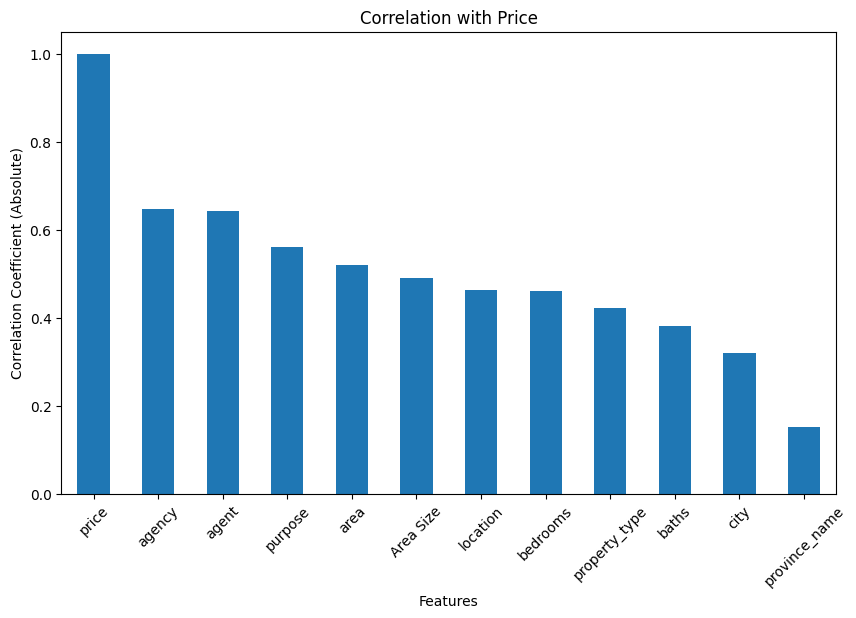

In [21]:
# Compute Pearson correlation coefficients
correlation_with_price = df.corr()['price'].abs().sort_values(ascending=False)

# Plotting the correlation coefficients
plt.figure(figsize=(10, 6))
correlation_with_price.plot(kind='bar')
plt.title('Correlation with Price')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient (Absolute)')
plt.xticks(rotation=45)
plt.show()

# Feature Engineering 

In [ ]:
## code here

In [ ]:
## code here

# splitting data

In [22]:
X = df.drop(columns=['price'], axis=1)
y = df[['price']]

X.shape, y.shape

((124374, 11), (124374, 1))

In [23]:

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape

((99499, 11), (99499, 1))

# Model Traning

In [24]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_train = y_train.values.ravel()

svr= SVR(kernel='rbf')
svr.fit(X_train,y_train)
y_pred=svr.predict(X_test)

# Model Evalution

In [25]:

train_r2 = r2_score(y_train, svr.predict(X_train))

test_r2 = r2_score(y_test, y_pred)

# Convert R-squared to percentage
train_accuracy_percentage = train_r2 * 100
test_accuracy_percentage = test_r2 * 100

print("Training Accuracy:", train_accuracy_percentage, "%")
print("Testing Accuracy:", test_accuracy_percentage, "%")

Training Accuracy: 91.75209798750734 %
Testing Accuracy: 91.72420579334712 %


# hesitation is defeat